In [55]:
# import modules and define functions
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, ticker, cm
import matplotlib as mpl
import os
os.environ['OMP_NUM_THREADS'] = "1"
def make_rdm1(mo_coeff, mo_occ):
    mocc = mo_coeff[:,mo_occ>0]
    return np.dot(mocc*mo_occ[mo_occ>0], mocc.conj().T)

In [52]:
outfs = [i for i in os.listdir(os.getcwd()) if i.endswith('.out') and 'tpss' not in i]
data_dict = {}
for outf in outfs:
    method = outf.split('_')[3].upper()
    lines = open(outf, 'r').read().splitlines()
    for i, line in enumerate(lines):
        if 'The Calculated Surface using the SCF energy' in line:
            data = lines[i+1:i+1+21]
            data = [list(filter(None, i.split(' '))) for i in data]
            keys, es = np.array(data, dtype=float).T
            break
    data_dict[method] = es * 27.2
    

In [72]:
df = pd.DataFrame(data_dict, dtype=float).T
df.columns = keys
df = df.T
df = df[['HF', 'VWN5', 'BP86', 'BLYP', 'PBE', 'SCAN', 'M06L']]

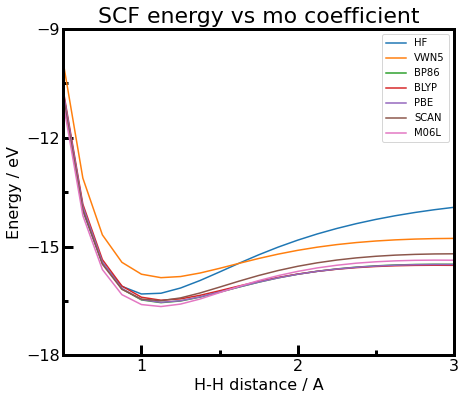

In [73]:
# plot the change of energy 
xlabel = 'H-H distance / A'
ylabel = 'Energy / eV'
title = 'SCF energy vs mo coefficient'
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 3
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 3
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

# start = 0.0
# stop = 1.0
# number_of_lines= len(df.columns)
# cm_subsection = np.linspace(start, stop, number_of_lines) 
# colors = [cm.jet(x) for x in cm_subsection]

fig, ax = plt.subplots(figsize=(7,6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1.5))
ax.set_ylim(-18, -9)
ax.set_xlim(0.5,3.0)
ax.set_xlabel(xlabel, fontsize=16)
ax.set_ylabel(ylabel, fontsize=16)
ax.set_title(title, fontsize=22)
ax.plot(df, label=df.columns)
ax.legend()